In [1]:
import pandas as pd

In [16]:
results = pd.read_csv('results.csv')

### Visualisation de la précision dense vs sparse

On visualise ici les différentes performances selon le type de retriever choisi (sparse / dense). <br> Dans le notebook *Visualisation results* (results de Pavel) on visualisait la performance pour chaque test, ici on visualise plutot la *performance moyenne* comme plusieurs tests ont été faits.

précision moyenne par rapport à k et retriever type: 
 k  retriever_type
1  dense             0.148723
   sparse            0.064119
2  sparse            0.096175
3  dense             0.180935
   sparse            0.141046
5  dense             0.195227
   sparse            0.223111
Name: precision, dtype: float64


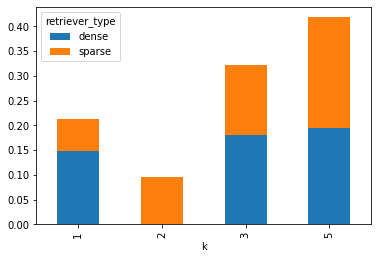

In [34]:
results_dense_sparse = results[results['filter_level'].isnull()]
results_dense_sparse.set_index('k', inplace=True)
mean_prec_sparse_dense = results_dense_sparse.groupby(['k','retriever_type'])['precision'].mean()
print("précision moyenne par rapport à k et retriever type: \n", mean_prec_sparse_dense)
mean_prec_sparse_dense.unstack().plot(kind='bar', stacked=True,legend=True)

Globalement le retriever *dense* donne des meilleurs résultats, sauf pour le cas k=5

### Visualisation des résultats avec filtrage par dossier

précision moyenne par rapport à k et au type de retriever pour filtrage 'dossier': 
 k  retriever_type
1  dense             0.344698
   sparse            0.323747
2  sparse            0.313275
3  dense             0.406866
   sparse            0.408369
5  dense             0.426887
   sparse            0.565911
Name: precision, dtype: float64


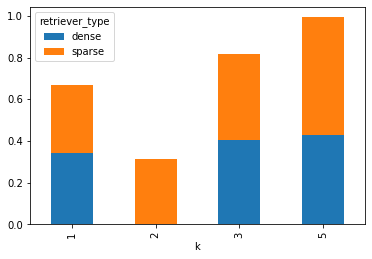

In [41]:
results_filtrage_dossier = results[results['filter_level']=='dossier']
results_filtrage_dossier.set_index('k', inplace=True)
mean_prec_filtrage_dossier = results_filtrage_dossier.groupby(['k','retriever_type'])['precision'].mean()
print("précision moyenne par rapport à k et au type de retriever pour filtrage 'dossier': \n", mean_prec_filtrage_dossier)
mean_prec_filtrage_dossier.unstack().plot(kind='bar',stacked=True,legend=True)

### Visualisation des résultats avec filtrage par thème

précision moyenne par rapport à k et au type de retriever pour filtrage 'thème': 
 k  retriever_type
1  dense             0.174294
   sparse            0.154648
2  sparse            0.219396
3  dense             0.260636
   sparse            0.218612
5  dense             0.282137
   sparse            0.216205
Name: precision, dtype: float64


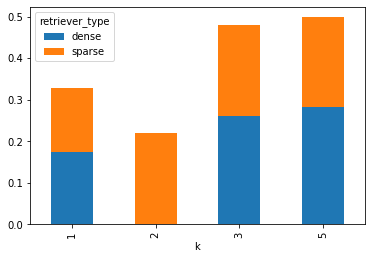

In [43]:
results_filtrage_theme = results[results['filter_level']=='theme']
results_filtrage_theme.set_index('k', inplace=True)
mean_prec_filtrage_theme = results_filtrage_theme.groupby(['k','retriever_type'])['precision'].mean()
print("précision moyenne par rapport à k et au type de retriever pour filtrage 'thème': \n", mean_prec_filtrage_theme)
mean_prec_filtrage_theme.unstack().plot(kind='bar',stacked=True,legend=True)

In [81]:
#Pourquoi meilleure performance pour dense ici?
print(len(results))
print(results['retriever_type'].value_counts())


print(len(results_filtrage_dossier))
print(results_filtrage_dossier['retriever_type'].value_counts())

print(len(results_filtrage_theme))
print(results_filtrage_theme['retriever_type'].value_counts())

134
sparse    105
dense      29
Name: retriever_type, dtype: int64
24
sparse    18
dense      6
Name: retriever_type, dtype: int64
41
sparse    27
dense     14
Name: retriever_type, dtype: int64


#### Conclusions:
- remarque: par rapport au notebook précédent, ici vu la forme des données j'ai plutot évalué la performance moyenne (pas possible d'en faire sur les données précédentes), donc les deux notebooks ne sont pas exactement comparables
- visualisation par type de retriever, **sans filtrage**: 
    - **comme pour les résultats trouvés par Pavel, ici le retriever dense a une meilleure performance en moyenne, sauf pour k $\geq$ 5, où le sparse devient meilleur dans les résultats trouvés par Robin**
    - **toujours une performance autour de 0.2 sans filtrage**
- Avec filtrage:
    - tout comme pour les résultats de Pavel, le filtrage *dossier* a une meilleure performance par rapport à *theme* et en termes de performance absolue (en moyenne)
    - **le choix *(dossier,sparse)* reste le plus performant**
    - cependant, pour le filtrage par *thème*, ici le retriever *dense* donne des meilleurs résultats
        - **possible explication: la classe 'dense' est sous-representée lors du filtrage, cela pourrait donc infuencer les résultats de performance**